    **Clone the following repo below**
    https://github.com/theschoolofai/YoloV3.git

In [ ]:
!git clone https://github.com/theschoolofai/YoloV3.git

Cloning into 'YoloV3'...
remote: Enumerating objects: 159, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 159 (delta 0), reused 1 (delta 0), pack-reused 156
Receiving objects: 100% (159/159), 12.75 MiB | 32.63 MiB/s, done.
Resolving deltas: 100% (7/7), done.


    Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


    Make weights directory in content/YoloV3

In [ ]:
!mkdir /content/YoloV3/weights

    Copy the weights from google drive 
    Source -: "/content/gdrive/MyDrive/YOLOV3Assign12/yolov3-spp-ultralytics.pt" 
    Destination -: "/content/YoloV3/weights"

In [ ]:
!cp "/content/gdrive/MyDrive/YOLOV3Assign12/yolov3-spp-ultralytics.pt" "/content/YoloV3/weights"

    First we will delete the customdata folder we got from below

    !git clone https://github.com/theschoolofai/YoloV3.git    


In [ ]:
!rm -rf YoloV3/data/customdata

    **Now we will copy our own custom data from goole drive**
    Note -:  We have already modified below Files based on the Images and Labels we have 
    1. custom.txt
    2. custom.names
    3. custom.data

In [ ]:
!cp -r "/content/gdrive/MyDrive/YOLOV3Assign12/customdata" "/content/YoloV3/data/"

In [ ]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.13.1+cu116 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15101MB, multi_processor_count=40)


In [ ]:
ls

gdrive/  sample_data/  YoloV3/


In [ ]:
cd YoloV3/

/content/YoloV3


In [ ]:
!ls

 annotation_tool   output	  results.txt	     train.py
 cfg		   __pycache__	  test_batch0.png   'ubdivisions=1'
 data		   README.md	  test.py	     utils
 detect.py	   results.json   ting		     vim.exe.stackdump
 models.py	   results.png	  train_batch0.png   weights


In [ ]:
!python train.py --data data/smalcoco/smalcoco.data --batch 3 --cache --epochs 3 --nosave


Namespace(epochs=3, batch_size=3, accumulate=4, cfg='cfg/yolov3-spp.cfg', data='data/smalcoco/smalcoco.data', multi_scale=False, img_size=[512], rect=False, resume=False, nosave=True, notest=False, evolve=False, bucket='', cache_images=True, weights='weights/yolov3-spp-ultralytics.pt', name='', device='', adam=False, single_cls=False)
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15101MB)

2023-03-23 21:38:12.967101: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-23 21:38:13.964666: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; 

    Modify the yolov3-custom.cfg 
    No of Classes are 4 (cat,clock,horse,laptop)
    No of Filters would be 27

In [ ]:
!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 300 --nosave

Namespace(epochs=300, batch_size=10, accumulate=4, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', multi_scale=False, img_size=[512], rect=False, resume=False, nosave=True, notest=False, evolve=False, bucket='', cache_images=True, weights='weights/yolov3-spp-ultralytics.pt', name='', device='', adam=False, single_cls=False)
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15101MB)

2023-03-23 22:03:04.118725: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-23 22:03:05.167517: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or direc

In [ ]:
!python detect.py --conf-thres 0.1 --output out_out

Namespace(cfg='cfg/yolov3-custom.cfg', names='data/customdata/custom.names', weights='weights/last.pt', source='data/customdata/images', output='out_out', img_size=512, conf_thres=0.1, iou_thres=0.6, fourcc='mp4v', half=False, device='', view_img=False, save_txt=False, classes=None, agnostic_nms=False, augment=False)
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15101MB)

Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
/usr/local/lib/python3.9/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
image 1/100 data/customdata/images/cat01.jpeg: 320x512 1 cats, Done. (0.032s)
image 2/100 data/customdata/images/cat02.jpeg: 512x384 1 cats, Done. (0.038s)
image 3/100 data/customdata/images/cat03.jpeg: 512x512 1 cat

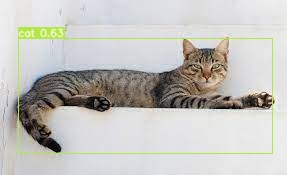

In [ ]:
Image(filename='out_out/cat01.jpeg', width=600)

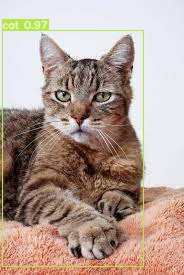

In [ ]:
Image(filename='out_out/cat02.jpeg', width=600)

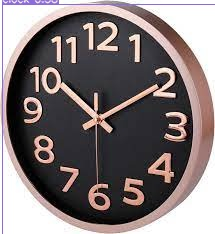

In [ ]:
Image(filename='out_out/clock13.jpeg', width=600)

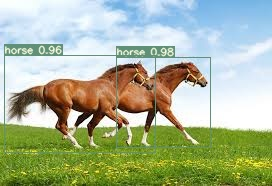

In [ ]:
Image(filename='out_out/horse20.jpeg', width=600)